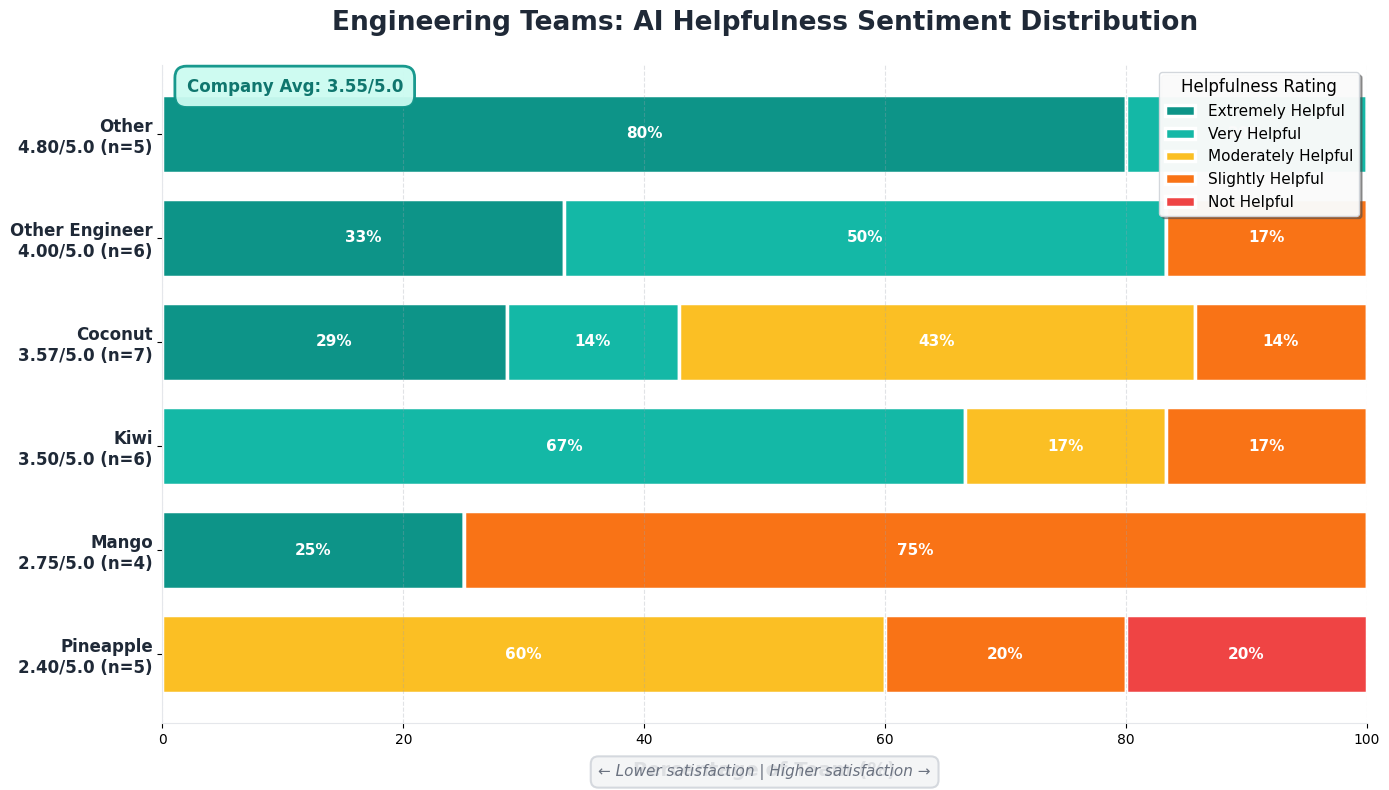


ENGINEERING TEAMS - AI HELPFULNESS SENTIMENT ANALYSIS

📊 Overall Company Average: 3.55/5.0
   Total Engineers: 33

⭐ Team Rankings (Best to Worst by Average Rating):
Rank   Team                 Avg Rating   Size     High Ratings % 
1      Other                4.80         5        100           %
2      Other Engineer       4.00         6        83            %
3      Coconut              3.57         7        43            %
4      Kiwi                 3.50         6        67            %
5      Mango                2.75         4        25            %
6      Pineapple            2.40         5        0             %

📈 Detailed Sentiment Breakdown:
Team                 Extremely    Very         Moderately    Slightly     Not     
Other                4            1            0             0            0       
Other Engineer       2            3            0             1            0       
Coconut              2            1            3             1            0       
Kiwi  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../responses.csv')

# Filter out non-engineering teams
teams_to_exclude = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[~df['Which team are you a part of?'].isin(teams_to_exclude)].copy()

# Get column names
team_col = 'Which team are you a part of?'
helpfulness_col = 'On a scale of 1 to 5, how would you rate the overall helpfulness of AI in your daily development tasks?'

# Create numeric mapping
rating_values = {
    'Extremely Helpful': 5,
    'Very Helpful': 4,
    'Moderately Helpful': 3,
    'Slightly Helpful': 2,
    'Not Helpful': 1
}

df_filtered['rating_numeric'] = df_filtered[helpfulness_col].map(rating_values)

# Define rating order
rating_order = ['Extremely Helpful', 'Very Helpful', 'Moderately Helpful', 'Slightly Helpful', 'Not Helpful']

# Create crosstab
team_sentiment = pd.crosstab(df_filtered[team_col], df_filtered[helpfulness_col])
team_sentiment = team_sentiment.reindex(columns=rating_order, fill_value=0)

# Calculate percentage for each team
team_sentiment_pct = team_sentiment.div(team_sentiment.sum(axis=1), axis=0) * 100

# Calculate average rating per team for sorting
team_avg_rating = df_filtered.groupby(team_col)['rating_numeric'].mean()

# Sort teams by average rating (best to worst)
sorted_teams = team_avg_rating.sort_values(ascending=True).index
team_sentiment_pct = team_sentiment_pct.reindex(sorted_teams)
team_sentiment = team_sentiment.reindex(sorted_teams)

# Get team sizes
team_sizes = team_sentiment.sum(axis=1)

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Modern gradient colors: teal/green (high) to orange/red (low)
colors = ['#0D9488', '#14B8A6', '#FBBF24', '#F97316', '#EF4444']

# Create stacked horizontal bar chart
left = np.zeros(len(sorted_teams))
bars = []

for i, rating in enumerate(rating_order):
    values = team_sentiment_pct[rating].values
    bars.append(ax.barh(range(len(sorted_teams)), values, left=left, 
                        color=colors[i], edgecolor='white', linewidth=2.5,
                        label=rating, height=0.75))
    
    # Add percentage labels if segment is large enough
    for j, (value, l) in enumerate(zip(values, left)):
        if value > 8:  # Only show label if segment is >8%
            ax.text(l + value/2, j, f'{value:.0f}%', 
                   ha='center', va='center', fontsize=11, weight='bold', color='white')
    
    left += values

# Customize plot
ax.set_yticks(range(len(sorted_teams)))

# Create y-axis labels with team name, average rating, and size
y_labels = []
for team in sorted_teams:
    avg = team_avg_rating[team]
    size = int(team_sizes[team])
    y_labels.append(f'{team}\n{avg:.2f}/5.0 (n={size})')

ax.set_yticklabels(y_labels, fontsize=12, weight='bold', color='#1F2937')
ax.set_xlabel('Percentage of Team (%)', fontsize=14, weight='bold', color='#1F2937', labelpad=10)
ax.set_title('Engineering Teams: AI Helpfulness Sentiment Distribution', 
            fontsize=19, weight='bold', pad=25, color='#1F2937')
ax.set_xlim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#E5E7EB')
ax.spines['bottom'].set_color('#E5E7EB')

# Add legend with improved styling
ax.legend(loc='upper right', fontsize=11, framealpha=0.95, 
         title='Helpfulness Rating', title_fontsize=12, 
         edgecolor='#D1D5DB', fancybox=True, shadow=True)

# Add grid
ax.grid(axis='x', alpha=0.3, linestyle='--', zorder=0, color='#9CA3AF')

# Add overall average line reference with modern teal theme
overall_avg = df_filtered['rating_numeric'].mean()
ax.text(0.02, 0.98, f'Company Avg: {overall_avg:.2f}/5.0', 
        transform=ax.transAxes, ha='left', va='top',
        fontsize=12, weight='bold',
        bbox=dict(boxstyle='round,pad=0.7', facecolor='#CCFBF1', 
                 edgecolor='#0D9488', linewidth=2, alpha=0.95),
        color='#0F766E')

# Add interpretation guide
guide_text = "← Lower satisfaction | Higher satisfaction →"
ax.text(0.5, -0.08, guide_text, 
        transform=ax.transAxes, ha='center',
        fontsize=11, style='italic', color='#6B7280',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#F3F4F6', 
                 edgecolor='#D1D5DB', linewidth=1.5, alpha=0.9))

plt.tight_layout()
plt.show()

# Print detailed summary
print("\n" + "="*80)
print("ENGINEERING TEAMS - AI HELPFULNESS SENTIMENT ANALYSIS")
print("="*80)

print(f"\n📊 Overall Company Average: {overall_avg:.2f}/5.0")
print(f"   Total Engineers: {len(df_filtered)}")

print(f"\n⭐ Team Rankings (Best to Worst by Average Rating):")
print(f"{'Rank':<6} {'Team':<20} {'Avg Rating':<12} {'Size':<8} {'High Ratings %':<15}")
print("="*80)

for i, team in enumerate(sorted_teams[::-1], 1):  # Reverse to show best first
    avg = team_avg_rating[team]
    size = int(team_sizes[team])
    high_ratings = team_sentiment.loc[team, ['Extremely Helpful', 'Very Helpful']].sum()
    high_pct = (high_ratings / size * 100)
    
    print(f"{i:<6} {team:<20} {avg:<12.2f} {size:<8} {high_pct:<14.0f}%")

print(f"\n📈 Detailed Sentiment Breakdown:")
print(f"{'Team':<20} {'Extremely':<12} {'Very':<12} {'Moderately':<13} {'Slightly':<12} {'Not':<8}")
print("="*80)

for team in sorted_teams[::-1]:
    row = team_sentiment.loc[team]
    print(f"{team:<20} {int(row['Extremely Helpful']):<12} "
          f"{int(row['Very Helpful']):<12} "
          f"{int(row['Moderately Helpful']):<13} "
          f"{int(row['Slightly Helpful']):<12} "
          f"{int(row['Not Helpful']):<8}")

print(f"\n✨ Key Insights:")

# Best and worst teams
best_team = sorted_teams[-1]
worst_team = sorted_teams[0]
best_avg = team_avg_rating[best_team]
worst_avg = team_avg_rating[worst_team]

print(f"   🏆 Highest Satisfaction: {best_team} ({best_avg:.2f}/5.0)")
print(f"   📉 Lowest Satisfaction: {worst_team} ({worst_avg:.2f}/5.0)")
print(f"   📊 Spread: {best_avg - worst_avg:.2f} points")

# Consistency analysis
if best_avg - worst_avg < 0.5:
    print(f"\n   • Very consistent sentiment across all teams - company-wide success!")
elif best_avg - worst_avg < 1.0:
    print(f"\n   • Moderate variation - some teams finding more value than others")
else:
    print(f"\n   • Significant variation - investigate why {worst_team} rates lower")

# Teams above/below average
above_avg_teams = [team for team in sorted_teams if team_avg_rating[team] > overall_avg]
below_avg_teams = [team for team in sorted_teams if team_avg_rating[team] < overall_avg]

print(f"\n   • {len(above_avg_teams)} teams above company average")
print(f"   • {len(below_avg_teams)} teams below company average")

# Unanimous positive sentiment check
for team in sorted_teams:
    negative_ratings = team_sentiment.loc[team, ['Slightly Helpful', 'Not Helpful']].sum()
    if negative_ratings == 0:
        print(f"\n   🎯 {team}: 100% positive ratings (Moderately or better)!")

print("\n" + "="*80 + "\n")